# Heart Disease Prediction (Logit-Regression)

### Our goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,238 records and 16 attributes.


Varibles:

Sex: male or female(Nominal)

Age: Age of the patient;

Education : Education of patient

Current Smoker: whether or not the patient is a current smoker (Nominal)

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.

BP Meds: whether or not the patient was on blood pressure medication (Nominal)

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

Diabetes: whether or not the patient had diabetes (Nominal)

Tot Chol: total cholesterol level (Continuous)

Sys BP: systolic blood pressure (Continuous)

Dia BP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

Heart Rate: heart rate (Continuous )

Glucose: glucose level (Continuous)

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) (Target Variable)

In [36]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

sns.set()

In [37]:
data = pd.read_csv(r"C:\Users\Human\OneDrive\Desktop\framingham.csv") # Reading the Data
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Data Exploration & Preprocessing

In [38]:
print(data.shape)
print('number of rows are',data.shape[0])
print('number of coloumns are',data.shape[1])

(4238, 16)
number of rows are 4238
number of coloumns are 16


In [39]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


#### Renaming the column 'male' to 'Gender' 

In [40]:
data.rename(columns={"male":"Gender"},inplace=True)

In [41]:
data.head(2)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [42]:
data[data.duplicated(keep=False)]

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


No duplicate entries in the data

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [44]:
#lets check the null Values
data.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

There are null values in  few coloumns

education     :     105

cigsPerDay     :     29

BPMeds          :    53

totChol          :   50

BMI            :     19

heartRate       :     1

glucose          :  388

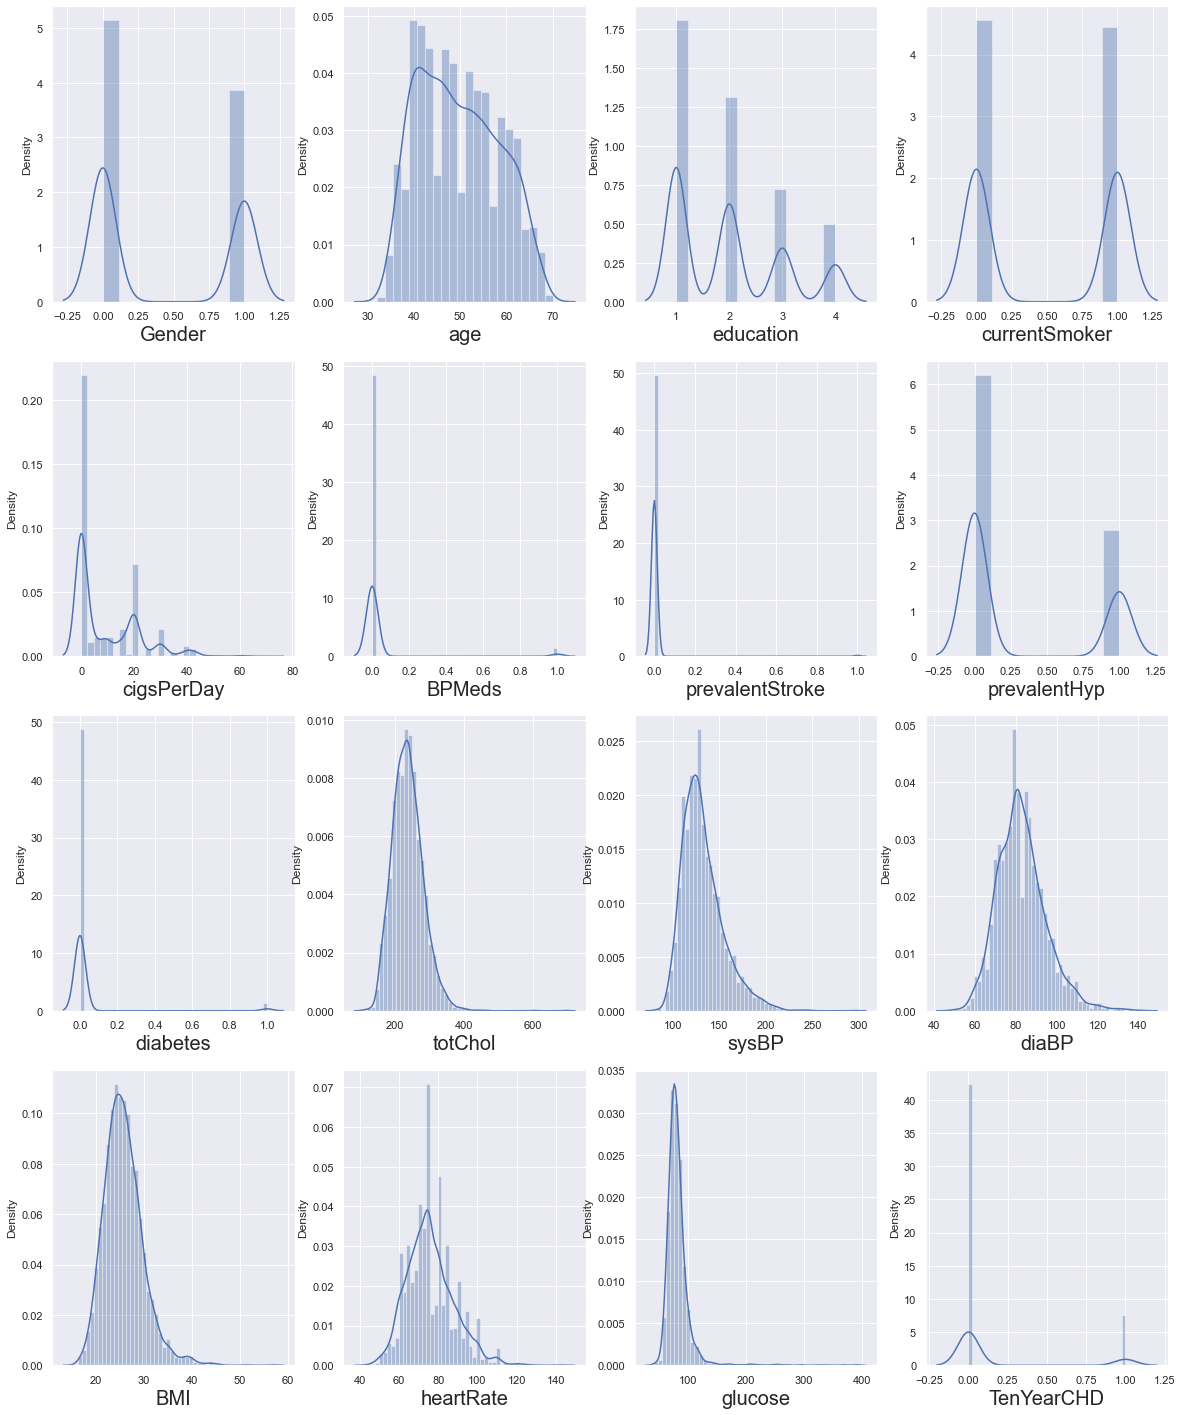

In [45]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :     # as there are 16 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

### Imputation of missing Values

In [46]:
data['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

from the data we can conclude that mode value for education coloumn is 1.0


In [47]:
data['education'] = data['education'].fillna(1.0)

In [48]:
data['cigsPerDay'].mode()

0    0.0
dtype: float64

In [49]:
data['cigsPerDay'] = data['cigsPerDay'].fillna(0)

In [50]:
data['BPMeds'].mode()

0    0.0
dtype: float64

In [51]:
data['BPMeds'] = data['BPMeds'].fillna(0)

In [52]:
data['totChol'].mean()

236.72158548233045

In [53]:
data['totChol'] = data['totChol'].fillna(236.72158548233045)

In [54]:
data['BMI'].mean()

25.80200758473571

In [55]:
data['BMI'] = data['BMI'].fillna(25.80200758473571)

In [56]:
data['glucose'].mean()

81.96675324675324

In [57]:
data['glucose'] = data['glucose'].fillna(81.96675324675324)

In [58]:
data['heartRate'].mean()

75.87892376681614

In [59]:
data['heartRate'] = data['heartRate'].fillna(75.87892376681614)

In [60]:
data.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

All the Null values are filled

## Data Visualization

### Create the coppy of Dataset for better understanding of data visualization

In [61]:
heartcopy=data.copy()

In [62]:
heartcopy['Gender']=heartcopy['Gender'].replace({0:'Female',1:'Male'})
heartcopy['currentSmoker']=heartcopy['currentSmoker'].replace({0:'No',1:'Yes'})
heartcopy['BPMeds']=heartcopy['BPMeds'].replace({0:'No',1:'Yes'})
heartcopy['prevalentStroke']=heartcopy['prevalentStroke'].replace({0:'No',1:'Yes'})
heartcopy['prevalentHyp']=heartcopy['prevalentHyp'].replace({0:'No',1:'Yes'})
heartcopy['diabetes']=heartcopy['diabetes'].replace({0:'No',1:'Yes'})
heartcopy['TenYearCHD']=heartcopy['TenYearCHD'].replace({0:'No',1:'Yes'})
heartcopy.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Female,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No


Text(0.5, 1.0, 'Diabetes')

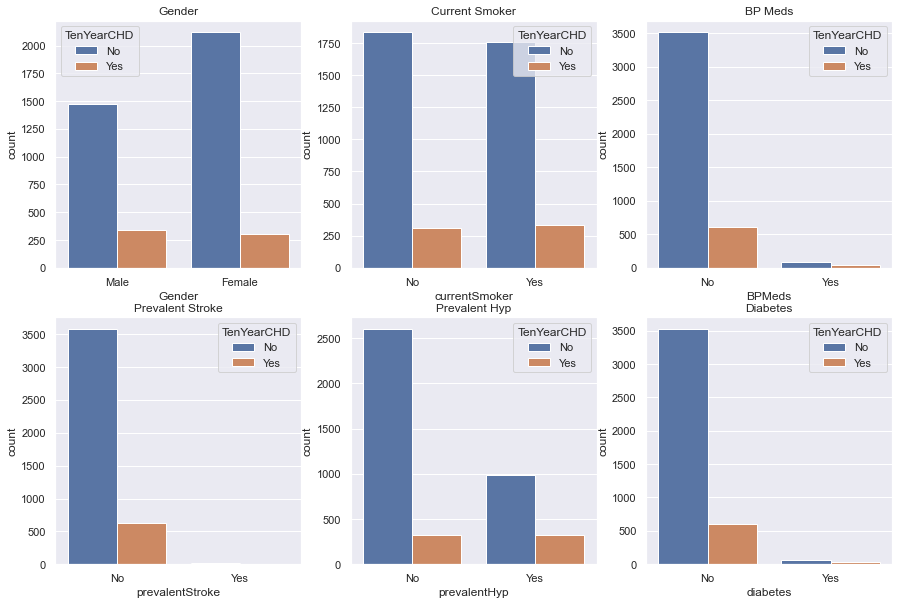

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('')

sns.countplot(ax=axes[0,0], x="Gender", hue="TenYearCHD", data=heartcopy)
axes[0,0].set_title('Gender')

sns.countplot(ax=axes[0,1], x="currentSmoker", hue="TenYearCHD", data=heartcopy)
axes[0,1].set_title('Current Smoker')

sns.countplot(ax=axes[0,2], x="BPMeds", hue="TenYearCHD", data=heartcopy)
axes[0,2].set_title('BP Meds')

sns.countplot(ax=axes[1,0], x="prevalentStroke", hue="TenYearCHD", data=heartcopy)
axes[1,0].set_title('Prevalent Stroke')

sns.countplot(ax=axes[1,1], x="prevalentHyp", hue="TenYearCHD", data=heartcopy)
axes[1,1].set_title('Prevalent Hyp')

sns.countplot(ax=axes[1,2], x="diabetes", hue="TenYearCHD", data=heartcopy)
axes[1,2].set_title('Diabetes')

In [64]:
x = data.drop('TenYearCHD',axis=1) # features
y = data['TenYearCHD'] # target

In [65]:
#Standardization of features
scalar = StandardScaler() 
X_scaled = scalar.fit_transform(x)

In [66]:
#Splitting of dataset 75/25
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [70]:
logreg = LogisticRegression()

In [71]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [72]:
logreg.score(x_train,y_train)

0.8521082441787288

In [74]:
y_pred = logreg.predict(x_test)

### Metrics

In [88]:
print('Accuracy score is',accuracy_score(y_test,y_pred)*100)


Accuracy score is 86.13207547169812


In [77]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[903  12]
 [135  10]]


In [84]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [81]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8613207547169811

In [89]:
# Precison
Precision = true_positive/(true_positive+false_positive)
print("precision is:",Precision)

precision is: 0.9868852459016394


In [90]:
Recall = true_positive/(true_positive+false_negative)
print("Recall is:",Recall)

Recall is: 0.869942196531792


In [91]:
f1=2*((Precision * Recall )) /(Precision + Recall)
print("f1 score is",f1*100)

f1 score is 92.4731182795699


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       915
           1       0.45      0.07      0.12       145

    accuracy                           0.86      1060
   macro avg       0.66      0.53      0.52      1060
weighted avg       0.81      0.86      0.81      1060



In [95]:
y_pred_prob = logreg.predict_proba(x_test)


In [97]:
print(y_pred_prob)

[[0.8484257  0.1515743 ]
 [0.95855664 0.04144336]
 [0.96990677 0.03009323]
 ...
 [0.66436362 0.33563638]
 [0.81340643 0.18659357]
 [0.94818855 0.05181145]]


In [98]:
y_pred_prob[:,1]

array([0.1515743 , 0.04144336, 0.03009323, ..., 0.33563638, 0.18659357,
       0.05181145])

In [99]:
Comparison = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
Comparison.head(15)

,Actual,Predicted
906,0,0
857,0,0
2761,0,0
108,1,0
2894,0,0
407,0,0
1792,0,0
3807,0,0
306,0,0
2354,0,0
